In [70]:
#Start Chaper 6 and Machine Learning, with A look at Linear Regression!

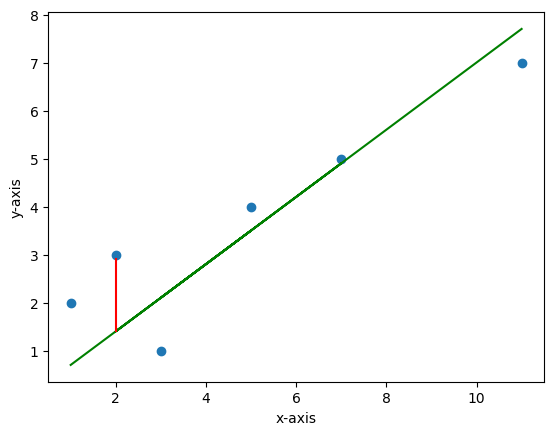

In [71]:
import matplotlib.pyplot as plt
import numpy

#Independent variable x axis
x = numpy.array([1, 5, 3, 7, 2, 11])
#Dependent variable y axis
y = numpy.array([2, 4, 1, 5, 3, 7])
#Scatter plot
plt.scatter(x, y)

#Naming axes
plt.xlabel('x-axis')
plt.ylabel('y-axis')

#Straight line
y_hat = 0.7 * x
plt.plot(x, y_hat, color = 'green')

#Example deviation
x1 = numpy.array([2, 2])
y1 = numpy.array([2.9, 1.4])
plt.plot(x1, y1, color = 'red')

#Save figure
plt.savefig("reg_illustration.png")
plt.show()

In [72]:
#Epsilon = y - y(predicted) = y - alpha - beta(x)
#eqn of a line

In [73]:
import pandas

file = "uk_property_data.csv"
df = pandas.read_csv(file)
print(df.head())

      time   price  new_build  volume
0  2005-03  151723      10654   70643
1  2005-04  153880      11611   85573
2  2005-05  155533      11461   86324
3  2005-06  156767      17500   94473
4  2005-07  158786      11692  106079


In [74]:
df['time_split'] = df.time.str.split("-")
print(df.time_split)

df['year'] = df.time_split.apply(lambda x: int(x[0]))
df['month'] = df.time_split.apply(lambda x: int(x[1]))

df = df.drop('time_split', axis = 1)

print(df.head())

0      [2005, 03]
1      [2005, 04]
2      [2005, 05]
3      [2005, 06]
4      [2005, 07]
          ...    
212    [2022, 11]
213    [2022, 12]
214    [2023, 01]
215    [2023, 02]
216    [2023, 03]
Name: time_split, Length: 217, dtype: object
      time   price  new_build  volume  year  month
0  2005-03  151723      10654   70643  2005      3
1  2005-04  153880      11611   85573  2005      4
2  2005-05  155533      11461   86324  2005      5
3  2005-06  156767      17500   94473  2005      6
4  2005-07  158786      11692  106079  2005      7


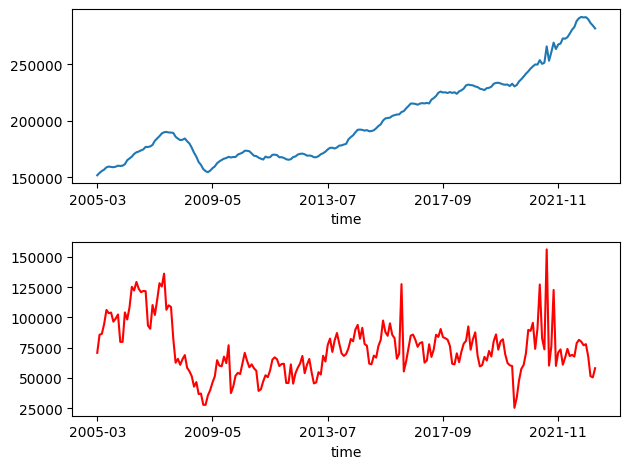

In [75]:
import matplotlib.pyplot as plt
df = df.set_index('time')
fig1, axes = plt.subplots(nrows=2, ncols=1)
df.price.plot(ax=axes[0])
df.volume.plot(ax=axes[1], color='red')
plt.tight_layout()
fig1.savefig("reg_deries.png")
plt.show()

In [76]:
#Having plotted price and volume a first-differenced time series is used to adjust 
#for seasonal differences. This is done by comparing the prices for a month with
#the price last month.

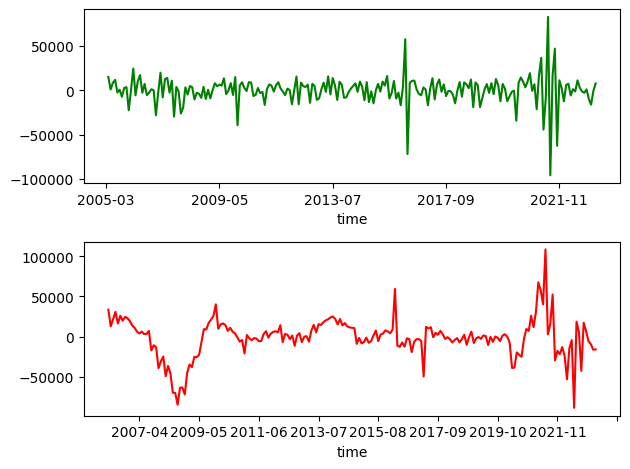

In [77]:
df['adj_price'] = (df.price - df.price.shift(12)).shift(1)
df['adj_volume'] = df.volume - df.volume.shift(12)
df['d_volume'] = df.volume.diff()
#Here the shift is used to ensure the independence of the independent variable.
fig2, axes = plt.subplots(nrows=2, ncols=1)
df.d_volume.plot(ax=axes[0], color='green')
df.adj_volume.plot(ax=axes[1], color='red')
plt.tight_layout()
fig2.savefig("reg_adjustment.png")
plt.show()

In [78]:
#we will model changes in hopuse sold volume using chngV = alpha + (Beta)chngp(t-1) + epsilon

In [79]:
import statsmodels.formula.api as smf

In [80]:
mod1 = smf.ols('adj_volume ~ adj_price', data=df)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:             adj_volume   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     17.30
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           4.72e-05
Time:                        03:02:48   Log-Likelihood:                -2338.2
No. Observations:                 204   AIC:                             4680.
Df Residuals:                     202   BIC:                             4687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6081.4892   1951.281     -3.117      0.0

In [81]:
year_dummies = pandas.get_dummies(data = df.year, prefix = 'Y')
df = df.join(year_dummies)
print(df.head())

          price  new_build  volume  year  month  adj_price  adj_volume  \
time                                                                     
2005-03  151723      10654   70643  2005      3        NaN         NaN   
2005-04  153880      11611   85573  2005      4        NaN         NaN   
2005-05  155533      11461   86324  2005      5        NaN         NaN   
2005-06  156767      17500   94473  2005      6        NaN         NaN   
2005-07  158786      11692  106079  2005      7        NaN         NaN   

         d_volume  Y_2005  Y_2006  ...  Y_2014  Y_2015  Y_2016  Y_2017  \
time                               ...                                   
2005-03       NaN    True   False  ...   False   False   False   False   
2005-04   14930.0    True   False  ...   False   False   False   False   
2005-05     751.0    True   False  ...   False   False   False   False   
2005-06    8149.0    True   False  ...   False   False   False   False   
2005-07   11606.0    True   False  ..

In [82]:
from statsmodels.iolib.summary2 import summary_col
mod2 = smf.ols('adj_volume ~ adj_price + Y_2008 + Y_2009', data=df)
res2 = mod2.fit()
print(res2.summary())

info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)), 'R2': lambda x: "{:.2f}".format(x.rsquared)}
dfoutput = summary_col([res1, res2], stars = True, float_format="%0.3f", model_names = ['Reference', 'Year'], info_dict = info_dict, regressor_order=['const', 'adj_price', 'Y_2008', 'Y_2009' ])
print(dfoutput)
dfoutput.as_latex()
with open('reg_table1.tex', 'w') as tf:
    tf.write(dfoutput.as_latex())

                            OLS Regression Results                            
Dep. Variable:             adj_volume   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     32.32
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           4.47e-17
Time:                        03:02:49   Log-Likelihood:                -2306.2
No. Observations:                 204   AIC:                             4620.
Df Residuals:                     200   BIC:                             4634.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1738.9937   2247.723     -0.

In [83]:
#LaTex makes some nice documents!

In [84]:
from sklearn.linear_model import LinearRegression
#Removing missing values
df = df.dropna()
#Define data matrix from DataFrame
#Convert to numpy array
X = df[['adj_price', 'Y_2008', 'Y_2009']].values
#Select dependednt variable
y = df['adj_volume'].values
reg = LinearRegression().fit(X, y)
#Show coefficients
print(reg.coef_)

#You can further predict the y_values and plot them using model.predict()

[ 3.77872099e-01 -5.10297423e+04  6.10534557e+03]


In [85]:
import numpy
beta, alpha = numpy.polyfit(df['adj_price'], df['adj_volume'], 1)

In [86]:
print(beta, alpha)

0.6040260509762758 -6081.48922367248


In [ ]:
beta, alpha = numpy.polyfit(df['adj_price'], df['adj_volume'], 1)
#Scatter plot
plt.plot(df['adj_price'], df['adj_volume'], 'o', color = 'gray', markersize = 2)
#Add regression line
plt.plot(df['adj_price'], alpha + beta*df['adj_price'], color = 'orange')
plt.savefig("reg_predict.png")
plt.show()

In [ ]:
#Exercise
dfr = pandas.read_csv("health.csv")

In [ ]:
print(dfr.head())

   year  iso  r_gdp  emp  hours  t_hours  pop  h_exp  DHI
0  2000  ABW    NaN  NaN    NaN      NaN  NaN    NaN  NaN
1  2001  ABW    NaN  NaN    NaN      NaN  NaN    NaN  NaN
2  2002  ABW    NaN  NaN    NaN      NaN  NaN    NaN  NaN
3  2003  ABW    NaN  NaN    NaN      NaN  NaN    NaN  NaN
4  2004  ABW    NaN  NaN    NaN      NaN  NaN    NaN  NaN


In [ ]:
dfr = dfr.dropna()

In [ ]:
print(dfr.head())

     year  iso      r_gdp       emp      hours    t_hours        pop  \
510  2000  AUS  798.33386  9.149832  1668.7325  15268.621  18.907146   
511  2001  AUS  819.14410  9.326920  1651.4933  15403.345  19.151474   
512  2002  AUS  853.04834  9.446833  1635.7274  15452.444  19.370564   
513  2003  AUS  876.71497  9.675038  1635.7019  15825.479  19.594622   
514  2004  AUS  912.92712  9.845531  1631.1083  16059.127  19.805267   

         h_exp        DHI  
510  1638.8149  57.310001  
511  1564.1665  57.310001  
512  1770.4662  57.310001  
513  2249.2908  57.310001  
514  2767.1370  57.310001  


In [ ]:
grouped = dfr.groupby('iso')
print(grouped.head())

      year  iso      r_gdp       emp      hours     t_hours        pop  \
510   2000  AUS  798.33386  9.149832  1668.7325  15268.6210  18.907146   
511   2001  AUS  819.14410  9.326920  1651.4933  15403.3450  19.151474   
512   2002  AUS  853.04834  9.446833  1635.7274  15452.4440  19.370564   
513   2003  AUS  876.71497  9.675038  1635.7019  15825.4790  19.594622   
514   2004  AUS  912.92712  9.845531  1631.1083  16059.1270  19.805267   
...    ...  ...        ...       ...        ...         ...        ...   
9450  2000  SWE  385.96265  4.300800  1643.4385   7068.1001   8.879968   
9451  2001  SWE  391.55719  4.391600  1620.1521   7115.0601   8.903890   
9452  2002  SWE  400.15939  4.393300  1597.0250   7016.2100   8.932915   
9453  2003  SWE  409.40231  4.368200  1583.2998   6916.1699   8.966145   
9454  2004  SWE  427.15750  4.337800  1606.8491   6970.1899   9.001475   

          h_exp        DHI  
510   1638.8149  57.310001  
511   1564.1665  57.310001  
512   1770.4662  57.3100

/tmp/ipykernel_1156/1413257103.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  list_of_values_per_group = grouped.apply(lambda x: x[['hours', 'h_exp']].values).tolist()
/tmp/ipykernel_1156/1413257103.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(m)


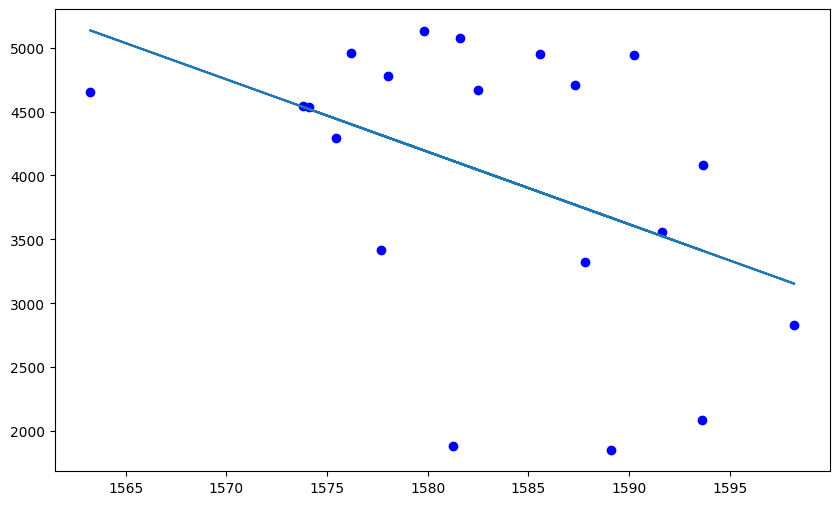

In [ ]:

list_of_values_per_group = grouped.apply(lambda x: x[['hours', 'h_exp']].values).tolist()
#Columns can be changed
z = numpy.array(list_of_values_per_group, dtype=object)

c = z[2]
#Country can be chosen
X = c[:,0].reshape(-1, 1)
y = c[:,1]

regression = LinearRegression().fit(X,y)
y_predicted = regression.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_predicted)
plt.show()

#.apply() is used on a grouped DataFrame